**Ejercicio 2:** (Ejercicio 7.5, Kuehl) Se realizó un experimento para comparar la exactitud de dos espectrómetros de masa en la medición de las proporciones de 14 N/ 15 N. Se tomaron dos muestras de suelo de cada una de tres parcelas tratadas con 15 N y se analizaron dos submuestras de cada muestra en cada una de dos máquinas. El diseño resultante tiene máquinas cruzadas con parcelas y muestras, pero las muestras están anidadas dentro de las parcelas. Los siguientes datos son las proporciones 14 N/ 15 N (multiplicadas por 1000).

In [1]:
datos = read.csv("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/03_efectos_aleatorios_y_mixtos/datos/ej2_guiaMixtos.csv", sep = ";")

In [2]:
head(datos)
str(datos)
attach(datos)
parcelaf = as.factor(parcela)
muestraf = as.factor(muestra)
maquinaf = as.factor(maquina)

proporcion,parcela,muestra,maquina
3.833,1,1,1
3.866,1,1,1
3.932,1,1,2
3.943,1,1,2
3.819,1,2,1
3.853,1,2,1


'data.frame':	24 obs. of  4 variables:
 $ proporcion: num  3.83 3.87 3.93 3.94 3.82 ...
 $ parcela   : int  1 1 1 1 1 1 1 1 2 2 ...
 $ muestra   : int  1 1 1 1 2 2 2 2 3 3 ...
 $ maquina   : int  1 1 2 2 1 1 2 2 1 1 ...


**a)** Escriba un modelo lineal para el experimento, suponga que las máquinas tienen efectos fijos y las parcelas y muestras, efectos aleatorios; explique los términos y calcule el análisis de varianza para los datos.

- Maquina: $\alpha$ (efecto fijo) - *i*
- Parcela: P (efecto aleatorio) - *j*
- Muestra: T (efecto aleatorio) - *k* anidada a parcela *j*

$$y_{ijkl} = \mu + \alpha_i + P_j + T_{k(j)} + (\alpha P)_{ij} + \epsilon_{ijkl}$$

**Lo rehago**

$$y_{ijkl} = \mu + \alpha_i + P_j + T_{k(j)} + \underbrace{(\alpha P)_{ij}}_{A} + \underbrace{(\alpha T)_{ik(j)}}_{B} + \epsilon_{ijkl}$$

Donde:
- A: efecto aleatorio de Maquina por interacción con Parcela
- B: efecto aleatorio de Maquina por interacción con Muestra anidado dentro de Parcela

<font color='red'>**PREGUNTA 1:** 
- a) Cargamos en un archivo manualmente los datos tal cual como figuran en la tabla del enunciado
- b) No estamos seguros de cómo armar el modelo para los casos donde los factores aleatorios están anidados. 
- c) ¿Se incluye la interacción triple o la interacción *Máquina-Parcela* ya incluye la *Muestra*?
- d) Cuando armamos el modelo no usamos %in% ya que cada *Muestra* tiene un número distinto, sin embargo si usamos el %in% obtuvimos resultados diferentes, ¿Cuál es la forma correcta?
</font>

In [3]:
library(lme4)

# asi lo habiamos hecho
#m0 = lmer(proporcion ~ maquinaf + (1|parcelaf) + (1|muestraf) + (1|maquinaf:parcelaf))

# lo pruebo ahora del siguiente modo, si uso los %in% me da error
m0 = lmer(proporcion ~ maquinaf + (1|parcelaf) + 
          (1|muestraf:parcelaf) + 
          (1|maquinaf:parcelaf) + 
          (1|maquinaf:muestraf:parcelaf))

summary(m0)

Loading required package: Matrix


Linear mixed model fit by REML ['lmerMod']
Formula: proporcion ~ maquinaf + (1 | parcelaf) + (1 | muestraf:parcelaf) +  
    (1 | maquinaf:parcelaf) + (1 | maquinaf:muestraf:parcelaf)

REML criterion at convergence: -97.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.79392 -0.27412  0.00808  0.28755  1.57098 

Random effects:
 Groups                     Name        Variance  Std.Dev.
 maquinaf:muestraf:parcelaf (Intercept) 9.807e-05 0.009903
 maquinaf:parcelaf          (Intercept) 0.000e+00 0.000000
 muestraf:parcelaf          (Intercept) 2.124e-03 0.046090
 parcelaf                   (Intercept) 1.995e-03 0.044662
 Residual                               1.698e-04 0.013030
Number of obs: 24, groups:  
maquinaf:muestraf:parcelaf, 12; maquinaf:parcelaf, 6; muestraf:parcelaf, 6; parcelaf, 3

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.79783    0.03240 117.235
maquinaf2    0.06492    0.00781   8.312

Correlation of Fixed Effects:
          (

- ``.sig01:`` maquinaf:muestraf:parcelaf
- ``.sig02:`` maquinaf:parcelaf 
- ``.sig03:`` muestraf:parcelaf 
- ``.sig04:`` parcelaf

In [4]:
confint(m0)

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.000000000,0.02302805
.sig02,0.000000000,0.01678990
.sig03,0.023312000,0.10906838
.sig04,0.000000000,0.13022518
.sigma,0.009153634,0.02031211
(Intercept),3.724341009,3.87132527
maquinaf2,0.048343558,0.08148983


Vemos que únicamente es significativo quien no incluye el 0 en el IC de la varianza el ``.sig3``, que corresponde a la combinación muestra con parcela, por lo que vamos a hacer un test entre el modelo completo y uno reducido para corroborarlo:

In [5]:
m0 = lmer(proporcion ~ maquinaf + (1|parcelaf) + 
          (1|muestraf:parcelaf) + 
          (1|maquinaf:parcelaf) + 
          (1|maquinaf:muestraf:parcelaf), REML = FALSE)
# esto habiamos hecho
#m1 = lmer(proporcion ~ maquinaf + (1|muestraf:parcelaf), REML=FALSE)

# pero nos dice que saquemos el fijo porque es lo que queremos ver si afecta o no 
m1 = lmer(proporcion ~ 1 + (1|parcelaf) + 
          (1|muestraf:parcelaf) + 
          (1|maquinaf:parcelaf) + 
          (1|maquinaf:muestraf:parcelaf), REML = FALSE)

anova(m0,m1)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m1,6,-87.40302,-80.33469,49.70151,-99.40302,NA,NA,NA
m0,7,-97.11655,-88.87017,55.55827,-111.11655,11.71353,1,0.000620473


Como vemos un **pvalor** es chico (<0.05) podemos rechazar la H0. En eso es que usaba chi2 para construir el pvalor que podría darnos mal porque es aproximada, esto es bueno cuando tenemos un n grande, sino no es muy confiable. **¿Puedo hacer algo mejor?** usamos esta otra ``lib``.

In [6]:
# ahora usamos esto que aproxima mejor que la chi2 cuando tenemos pocas muestras
library(pbkrtest)
KRmodcomp(m1,m0)

# nos da un pvalor mas grande pero sigue siendo significativo. Si se contradicen les creemos a este en vez de a anova

F-test with Kenward-Roger approximation; computing time: 0.19 sec.
large : proporcion ~ maquinaf + (1 | parcelaf) + (1 | muestraf:parcelaf) + 
    (1 | maquinaf:parcelaf) + (1 | maquinaf:muestraf:parcelaf)
small : proporcion ~ 1 + (1 | parcelaf) + (1 | muestraf:parcelaf) + (1 | 
    maquinaf:parcelaf) + (1 | maquinaf:muestraf:parcelaf)
        stat    ndf    ddf F.scaling p.value  
Ftest 69.096  1.000  2.000         1 0.01417 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Ahora hace un test de shapiro, pvalor grande asi que es normal

In [7]:
shapiro.test(residuals(m1))


	Shapiro-Wilk normality test

data:  residuals(m1)
W = 0.92953, p-value = 0.09515


**b) Muestre los cuadrados medios esperados.**

Para que lo que queremos, para estimar varianza, cuando queremos un estimador de la varianza. Para que nos sirve es para **tener una idea de potencia**, usaba un F0 = MSA/MSE bajo la H0, y bajo la H1: 

F0 = MSA/E(MSA) / MSE/E(MSE)

= 1 / 1 + tau = MSA/MSE



Ahora usamos EMSanova para obtener los EMS.

<font color='red'>**PREGUNTA 2:** 
- a) Los *pvalores* obtenidos de la tabla ``EMSanova`` contradicen lo que obtuvimos en los IC previos del ``lmer``: acá nos dice que no hay efecto significativo de la interacción *Maquina-Muestra* porque el pvalor es grande (0.128) cuando previamente vimos un IC que no contenía el 0.
- b) ¿``EMSanova`` se puede usar solamente con 1 efecto aleatorio? Porque si probamos de usar con mas de uno nos devuelve valores NA y sin pvalores
</font>    

In [9]:
library(EMSaov)

In [10]:
# agregamos los factores al dataframe
datos$parcelaf = parcelaf
datos$muestraf = muestraf
datos$maquinaf = maquinaf

m2 = EMSanova(proporcion ~ maquinaf + parcelaf + muestraf, type = c("F", "R", "R"), nested=c(NA, NA, "parcelaf"), data = datos)

In [24]:
print(m2)

                  Df          SS           MS  Fvalue  Pvalue Sig
maquinaf           1 0.025285042 0.0252850417 69.0958   4e-04 ***
muestraf           5 0.076230708 0.0152461417 89.7932 <0.0001 ***
maquinaf:muestraf  5 0.001829708 0.0003659417  2.1552   0.128    
Residuals         12 0.002037500 0.0001697917                    
                                                  EMS
maquinaf          Error+2maquinaf:muestraf+12maquinaf
muestraf                              Error+4muestraf
maquinaf:muestraf            Error+2maquinaf:muestraf
Residuals                                       Error


Los EMS son:

- maquinaf          Error+2maquinaf:muestraf+12maquinaf
- muestraf                              Error+4muestraf
- maquinaf:muestraf            Error+2maquinaf:muestraf

**c) Pruebe la hipótesis nula de que no hay diferencia entre las medias para las dos máquinas.**

Veamos el IC de la comparación entre ambas máquinas:

In [31]:
library(multcomp)

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



<font color='red'>**PREGUNTA 3:** Con esta comparación vemos que no son equivalentes las dos máquinas ¿Está bien esto?
</font> 

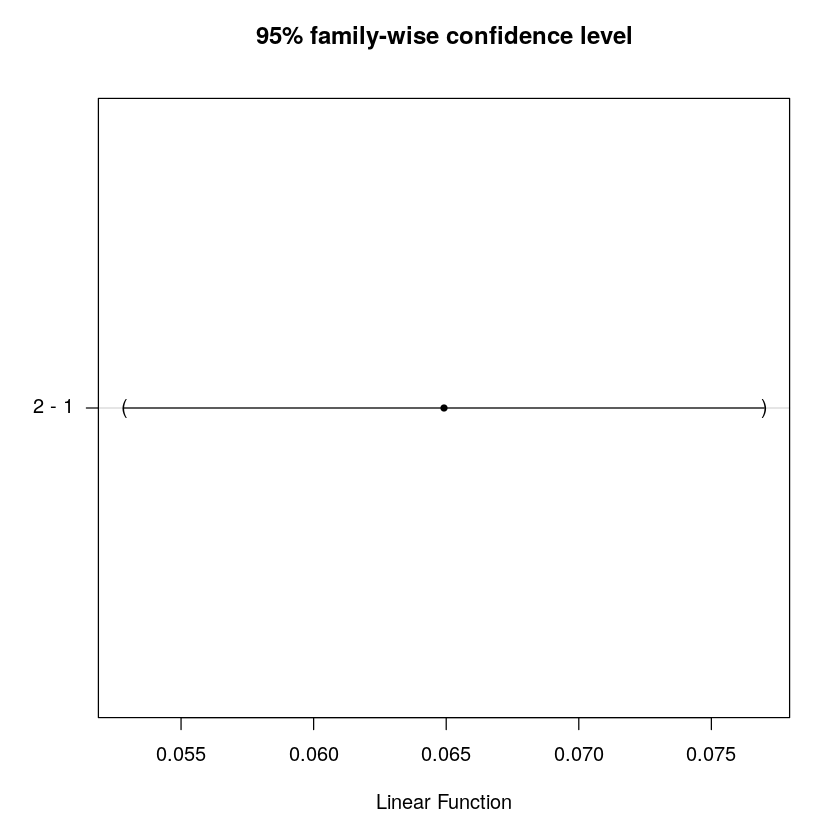

In [34]:
plot(glht(m1, linfct = mcp(maquinaf="Tukey")))

Vemos que el gráfico del IC no contiene el 0 por lo que hay diferencias entre las medias de las máquinas y por lo tanto se rechaza la H0.